In [4]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [5]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [6]:
# directory_19 = r'F:\Ecobee\files\2019_sac'
# for filename in os.listdir(directory_19):
#     if filename.endswith(".zip"):
#         print(os.path.join(directory_19, filename))
#     else:
#         continue

In [7]:
# users_sac_2019_name_list_csv=[w[:-4] for w in os.listdir(directory_19)]

# users_sac_2019_name_list_csv

In [8]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_peak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_peak = pd.concat([df_sac_18_daily_peak, df_day])
    g.close()
    myzip.close()

In [9]:
df_sac_18_daily_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21215 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21215 non-null  object 
 1   daily_total_heating  21215 non-null  float64
 2   daily_total_cooling  21215 non-null  float64
 3   user_id              21215 non-null  object 
dtypes: float64(2), object(2)
memory usage: 828.7+ KB


In [10]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2018
df_18_temp=df_sac_18_daily_peak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
df_sac_18_daily_peak=pd.merge(df_18_temp,df_sac_18_daily_peak,how='left', on='user_id')


In [11]:
df_sac_18_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000


In [12]:
from zipfile import ZipFile
directory_19 = r'F:\Ecobee\files\2019_sac'
df_sac_19_daily_peak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_peak = pd.concat([df_sac_19_daily_peak, df_day])
    f.close()
    myzip.close()

In [13]:
df_sac_19_daily_peak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,1.937500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.095833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.945833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,2.187500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.791667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [14]:
# pd.set_option('display.max_rows', None)
# #remove user_ids that have no cooling consumption at all for 2019
# df_19_temp=df_sac_19_daily_peak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
# df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
# df_sac_19_daily_peak=pd.merge(df_19_temp,df_sac_19_daily_peak,how='left', on='user_id')

In [15]:
df_sac_19_daily_peak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,1.937500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.095833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.945833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,2.187500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.791667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [16]:
df_sac_18n19_daily_peak=pd.concat([df_sac_18_daily_peak,df_sac_19_daily_peak])
df_sac_18n19_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000


In [17]:
df_sac_18n19_daily_peak['count'] = df_sac_18n19_daily_peak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_peak['count'].value_counts()

243    28431
121    19481
241     2169
242     1452
223     1115
239      717
237      711
235      470
117      468
231      462
230      460
219      438
119      357
118      354
97       291
122      244
120      240
240      240
238      238
236      236
232      232
229      229
226      226
225      225
224      224
222      222
220      220
218      218
108      216
212      212
206      206
194      194
192      192
187      187
175      175
168      168
84       168
83       166
165      165
157      157
151      151
144      144
134      134
126      126
124      124
115      115
112      112
110      110
109      109
101      101
100      100
96        96
94        94
89        89
87        87
73        73
65        65
46        46
45        45
37        37
12        12
3          3
Name: count, dtype: int64

In [18]:
df_sac_18n19_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000,243


In [19]:
df_sac_18n19_daily_peak=df_sac_18n19_daily_peak[df_sac_18n19_daily_peak['count']>=241]
df_sac_18n19_daily_peak['Date']=pd.to_datetime(df_sac_18n19_daily_peak['Date'])
df_sac_18n19_daily_peak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000,243


In [20]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [21]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [22]:
df_sac_18n19_daily_peak_w_temperature=pd.merge(df_sac_18n19_daily_peak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_peak_w_temperature.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.116667,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,1.050000,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,1.941667,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,0.820833,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.000000,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [25]:
# generate a new column indicating on/off of cooling AC
df_sac_18n19_daily_peak_w_temperature["AC_cooling_on"] = np.where(
    df_sac_18n19_daily_peak_w_temperature["daily_total_cooling"] > 0, 1, 0
)

In [26]:
df_sac_18n19_daily_peak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [27]:
df_sac_18n19_daily_peak_w_temperature['y2019']=np.where(df_sac_18n19_daily_peak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_peak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_peak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,AC_cooling_on,TAVG_less_62,y2019
count,32052.000000,32052.000000,32052.000000,32052.000000,32052.000000,32052.000000,32052.000000,32052.000000,32052.000000
mean,0.000004,0.953634,242.819356,72.702764,90.348902,58.472794,0.707351,10.739829,0.497878
std,0.000531,0.932292,0.532319,5.165113,7.219455,3.978089,0.454986,5.074219,0.500003
min,0.000000,0.000000,241.000000,58.000000,69.000000,45.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,243.000000,69.000000,86.000000,56.000000,0.000000,7.000000,0.000000
50%,0.000000,0.779167,243.000000,73.000000,91.000000,58.000000,1.000000,11.000000,0.000000
75%,0.000000,1.608333,243.000000,76.000000,96.000000,61.000000,1.000000,14.000000,1.000000
max,0.083333,3.000000,243.000000,86.000000,105.000000,69.000000,1.000000,24.000000,1.000000


In [28]:
df_sac_18n19_daily_peak_w_temperature[
    'interaction'] = df_sac_18n19_daily_peak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_peak_w_temperature['y2019']

In [29]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_peak_w_temperature.groupby('user_id').apply(
    regress, 'AC_cooling_on', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.020334,-0.003226,0.680763
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.055918,-0.002523,0.129926
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.010449,0.002981,0.792478
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.021566,0.003572,0.591491
4,0614c5d47de23d61b21be2141907668a54bf45a0,0.015754,0.013083,0.554087
5,06d89337caa78e3ed6e3591c9e22b8808a82c327,0.047890,0.007790,0.136408
6,0773f65bc76833bddd55f0f850ded5d14bc8ab99,0.042992,0.006246,0.210220
7,084a2b8c0522a36209d062d852d04bb64494ea84,0.034069,0.008571,0.325644
8,0aec426e98899420452f505669f36b1f47651c68,0.043126,-0.013368,0.230760
9,0f50223ca3a7c1def87d95d3696719692d5d3d33,0.025101,-0.000429,0.609400


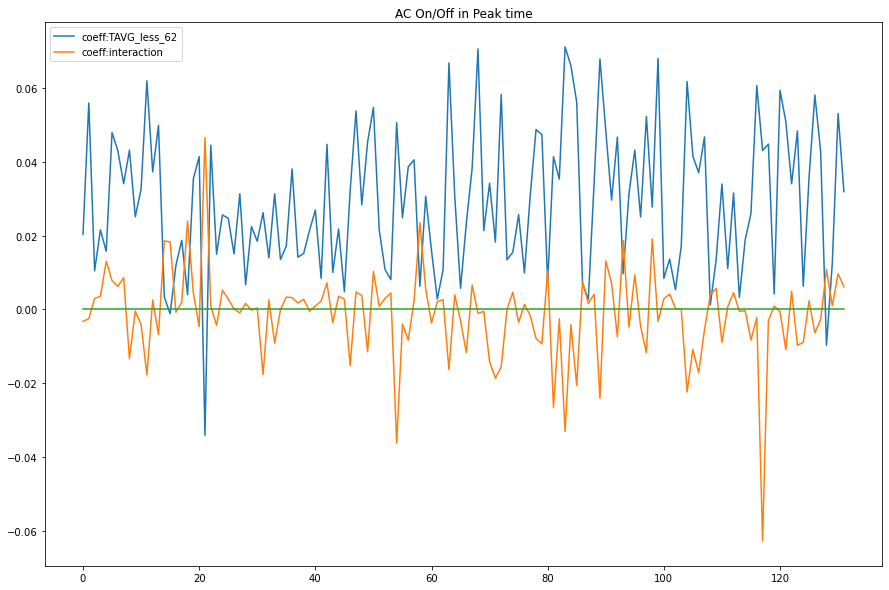

In [30]:
# x axis range
x = range(len(results))
plt.figure(figsize=(15,10))
# y2
plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# y2
plt.plot(x,results['interaction'],label='coeff:interaction')
# y=0 line 
plt.plot(x,[0] * len(results))
plt.legend(loc="upper left")
plt.title('AC On/Off in Peak time')
plt.show()

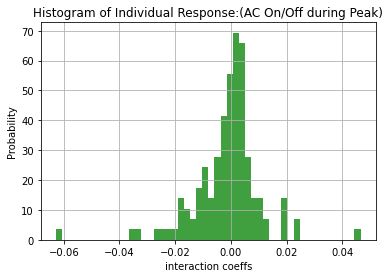

In [44]:
plt.hist(results['interaction'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('interaction coeffs')
plt.ylabel('Probability')
plt.title('Histogram of Individual Response:(AC On/Off during Peak)')
plt.grid(True)
plt.show()

In [32]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         12
TAVG_less_62    12
interaction     12
intercept       12
dtype: int64
user_id         21
TAVG_less_62    21
interaction     21
intercept       21
dtype: int64


In [33]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

0.22652650217044434
-0.42799881814202195


In [42]:
df_sac_18n19_daily_peak_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_peak_w_temperature['AC_cooling_on'], \
              exog=df_sac_18n19_daily_peak_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print('*'*34+'On/Off: Peak'+'*'*34)
print(reg_result.summary())
#Peak Hours: 5pm to 8pm (not removing zero consumption)
#2019 consumption LOWERED by peak pricing, -12.9%

**********************************On/Off: Peak**********************************
                            OLS Regression Results                            
Dep. Variable:          AC_cooling_on   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1802.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:28:11   Log-Likelihood:                -18560.
No. Observations:               32052   AIC:                         3.713e+04
Df Residuals:                   32049   BIC:                         3.715e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [35]:
df_sac_18n19_daily_peak.user_id.nunique()

132